In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset

In [8]:
imdb_ds = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
print(imdb_ds.shape)
imdb_ds.head(15)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# Preprocessing

1. Convert all letters to lowercase

In [11]:
imdb_ds['review'] = imdb_ds['review'].str.lower()
imdb_ds.head(15)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
5,"probably my all-time favorite movie, a story o...",positive
6,i sure would like to see a resurrection of a u...,positive
7,"this show was an amazing, fresh & innovative i...",negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


2. Remove HTML tags

In [16]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [20]:
example_html = "<p>This is a <strong>test</strong><br>"
print(strip_html_tags(example_html))

This is a test


In [21]:
imdb_ds['review'] = imdb_ds['review'].apply(strip_html_tags)
imdb_ds.head(15)

/tmp/ipykernel_35/1532008654.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
5,"probably my all-time favorite movie, a story o...",positive
6,i sure would like to see a resurrection of a u...,positive
7,"this show was an amazing, fresh & innovative i...",negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


3. Remove punctuation

In [22]:
import string
punc = string.punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
def remove_punctuation(text):
    return ''.join([char for char in text if char not in punc])

example_punc = "test ??>< test ,. ; test:'{} test &^*'"

print(remove_punctuation(example_punc))

test  test   test test 


In [24]:
imdb_ds['review'] = imdb_ds['review'].apply(remove_punctuation)
imdb_ds.head(15)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


4. Remove stopwords

In [27]:
def remove_stopwords(text):

    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    words = text.split()
    no_words = [w for w in words if w not in stopwords]
    text = " ".join(no_words)

    return text

In [28]:
imdb_ds['review'] = imdb_ds['review'].apply(remove_stopwords)
imdb_ds.head(15)

,review,sentiment
0,one reviewers mentioned watching just 1 oz epi...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure like see resurrection dated seahunt serie...,positive
7,show amazing fresh innovative idea 70s first a...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter will like...,positive


# Split dataset

In [31]:
#train dataset
train_reviews = imdb_ds['review'][:40000]
train_labels = imdb_ds['sentiment'][:40000]

#test dataset
test_reviews = imdb_ds['review'][40000:]
test_labels = imdb_ds['sentiment'][40000:]

print(train_reviews.shape,train_labels.shape)
print(test_reviews.shape,test_labels.shape)

(40000,) (40000,)
(10000,) (10000,)


# Label encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

encoded_train_labels = encoder.fit_transform(train_labels)
encoded_test_labels = encoder.fit_transform(test_labels)

In [45]:
print("Label Mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

Label Mapping: {'negative': 0, 'positive': 1}


In [41]:
encoded_test_labels[:20]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])

# Tokenize

In [34]:
# Parameters
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# Initialize Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_reviews)
word_index = tokenizer.word_index

# Generate and pad the training sequences
train_sequences = tokenizer.texts_to_sequences(train_reviews)
train_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = pad_sequences(test_sequences,maxlen=max_length)

In [35]:
test_padded

array([[   0,    0,    0, ...,   86,   51, 1495],
       [   0,    0,    0, ...,   64,   40, 3664],
       [   0,    0,    0, ...,    4,    2,  873],
       ...,
       [   0,    0, 3933, ...,    1,    1, 5670],
       [   0,    0,    0, ..., 4227,   15,  610],
       [   0,    0,    0, ..., 4083,  722,    2]], dtype=int32)

# Model 

## LSTM

In [141]:
# Parameters
embedding_dim = 4
lstm_dim = 4
dense_dim = 4
lr = 0.0001

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_lstm.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                      metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_37 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## CNN

In [142]:
# Parameters
embedding_dim = 4
filters = 4
kernel_size = 3
dense_dim = 4
lr = 0.0001

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_conv.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                      metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_38 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_9      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Flatten

In [143]:
# Parameters
embedding_dim = 4 #16
dense_dim = 4 #6
lr = 0.0001

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_flatten.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                      metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_39 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Training

## LSTM

In [144]:
NUM_EPOCHS = 15
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(train_padded, 
                              encoded_train_labels, 
                              batch_size=BATCH_SIZE, 
                              epochs=NUM_EPOCHS, 
                              validation_data=(test_padded, encoded_test_labels))

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5166 - loss: 0.6928 - val_accuracy: 0.6020 - val_loss: 0.6914
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6219 - loss: 0.6907 - val_accuracy: 0.7005 - val_loss: 0.6857
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7030 - loss: 0.6808 - val_accuracy: 0.7859 - val_loss: 0.6003
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7953 - loss: 0.5552 - val_accuracy: 0.8307 - val_loss: 0.4871
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8389 - loss: 0.4715 - val_accuracy: 0.8391 - val_loss: 0.4501
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8548 - loss: 0.4316 - val_accuracy: 0.8455 - val_loss: 0.4301
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8643 - loss: 0.4106 - val_accuracy: 0.8395 - val_loss: 0.4226
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8760 - loss: 0.3877 - val_accu

## CNN

In [145]:
NUM_EPOCHS = 15
BATCH_SIZE = 128

# Train the model
history_CNN = model_conv.fit(train_padded, 
                              encoded_train_labels, 
                              batch_size=BATCH_SIZE, 
                              epochs=NUM_EPOCHS, 
                              validation_data=(test_padded, encoded_test_labels))

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5372 - loss: 0.6930 - val_accuracy: 0.7301 - val_loss: 0.6923
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7186 - loss: 0.6918 - val_accuracy: 0.7911 - val_loss: 0.6894
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7528 - loss: 0.6881 - val_accuracy: 0.7125 - val_loss: 0.6823
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7134 - loss: 0.6799 - val_accuracy: 0.7202 - val_loss: 0.6707
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7309 - loss: 0.6673 - val_accuracy: 0.7632 - val_loss: 0.6553
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7787 - loss: 0.6513 - val_accuracy: 0.7525 - val_loss: 0.6379
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7768 - loss: 0.6331 - val_accuracy: 0.7889 - val_loss: 0.6180
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7892 - loss: 0.6146 - val_accuracy: 0.

## Flatten

In [146]:
NUM_EPOCHS = 15
BATCH_SIZE = 128

# Train the model
history_flatten= model_flatten.fit(train_padded, 
                              encoded_train_labels, 
                              batch_size=BATCH_SIZE, 
                              epochs=NUM_EPOCHS, 
                              validation_data=(test_padded, encoded_test_labels))

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5052 - loss: 0.6930 - val_accuracy: 0.5182 - val_loss: 0.6924
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5393 - loss: 0.6911 - val_accuracy: 0.5560 - val_loss: 0.6903
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5860 - loss: 0.6876 - val_accuracy: 0.6187 - val_loss: 0.6847
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6596 - loss: 0.6801 - val_accuracy: 0.6950 - val_loss: 0.6708
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7291 - loss: 0.6632 - val_accuracy: 0.7515 - val_loss: 0.6427
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7709 - loss: 0.6316 - val_accuracy: 0.7790 - val_loss: 0.6000
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7904 - loss: 0.5878 - val_accuracy: 0.8073 - val_loss: 0.5498
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.5383 - val_accuracy: 0.

# Training evaluation

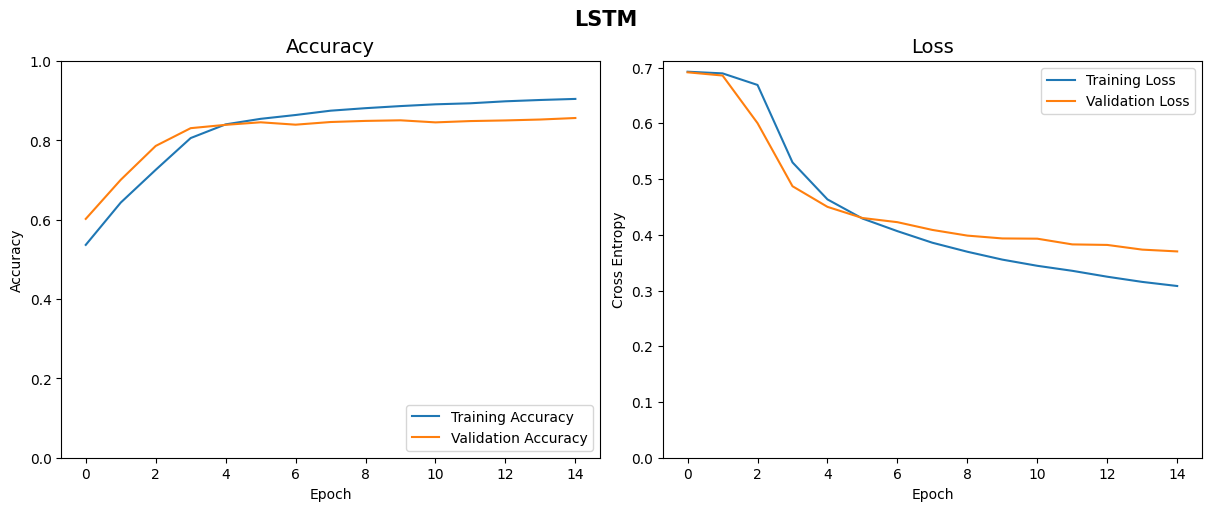

In [147]:
# training and validation accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), constrained_layout=True)

acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set(xlabel='Epoch', ylabel='Accuracy', ylim=[min(plt.ylim()),1])
ax[0].set_title('Accuracy', size=14)

# training and validation loss
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set(xlabel='Epoch', ylabel='Cross Entropy', ylim=[0,max(plt.ylim())])
ax[1].set_title('Loss', size=14)

fig.suptitle("LSTM", fontweight="bold", size=15)
plt.show()

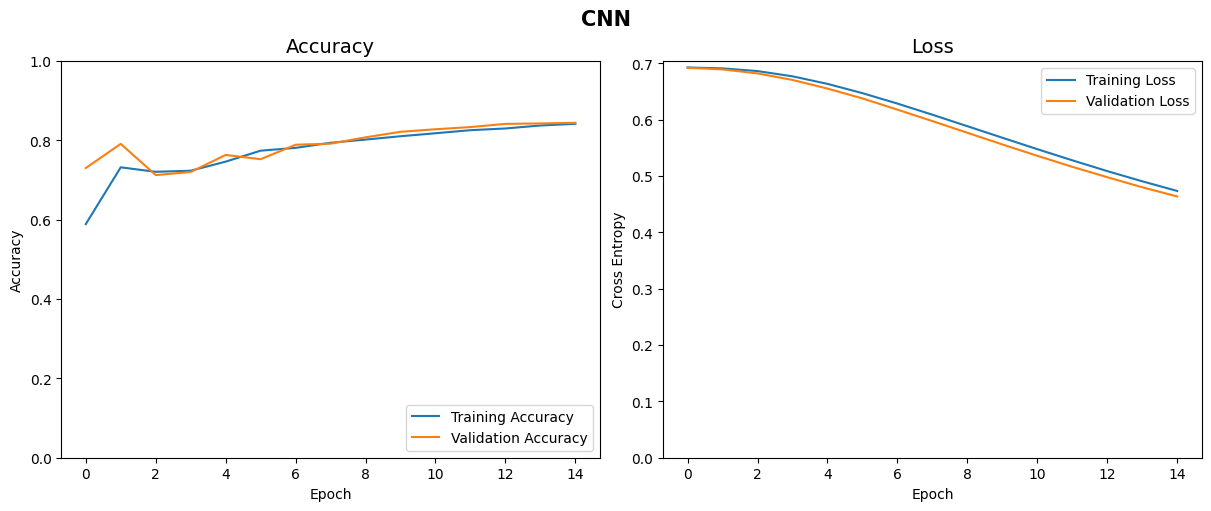

In [148]:
# training and validation accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), constrained_layout=True)

acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set(xlabel='Epoch', ylabel='Accuracy', ylim=[min(plt.ylim()),1])
ax[0].set_title('Accuracy', size=14)

# training and validation loss
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set(xlabel='Epoch', ylabel='Cross Entropy', ylim=[0,max(plt.ylim())])
ax[1].set_title('Loss', size=14)

fig.suptitle("CNN", fontweight="bold", size=15)
plt.show()

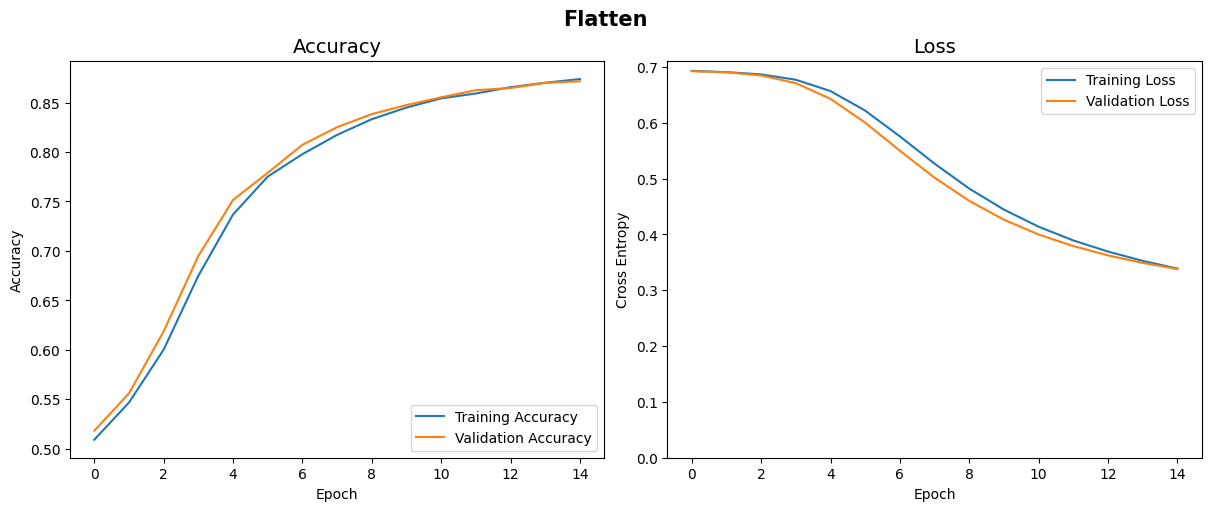

In [149]:
# training and validation accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), constrained_layout=True)

acc = history_flatten.history['accuracy']
val_acc = history_flatten.history['val_accuracy']

ax[0].plot(acc, label='Training Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set(xlabel='Epoch', ylabel='Accuracy')
ax[0].set_title('Accuracy', size=14)

# training and validation loss
loss = history_flatten.history['loss']
val_loss = history_flatten.history['val_loss']

ax[1].plot(loss, label='Training Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set(xlabel='Epoch', ylabel='Cross Entropy', ylim=[0,max(plt.ylim())])
ax[1].set_title('Loss', size=14)

fig.suptitle("Flatten", fontweight="bold", size=15)
plt.show()

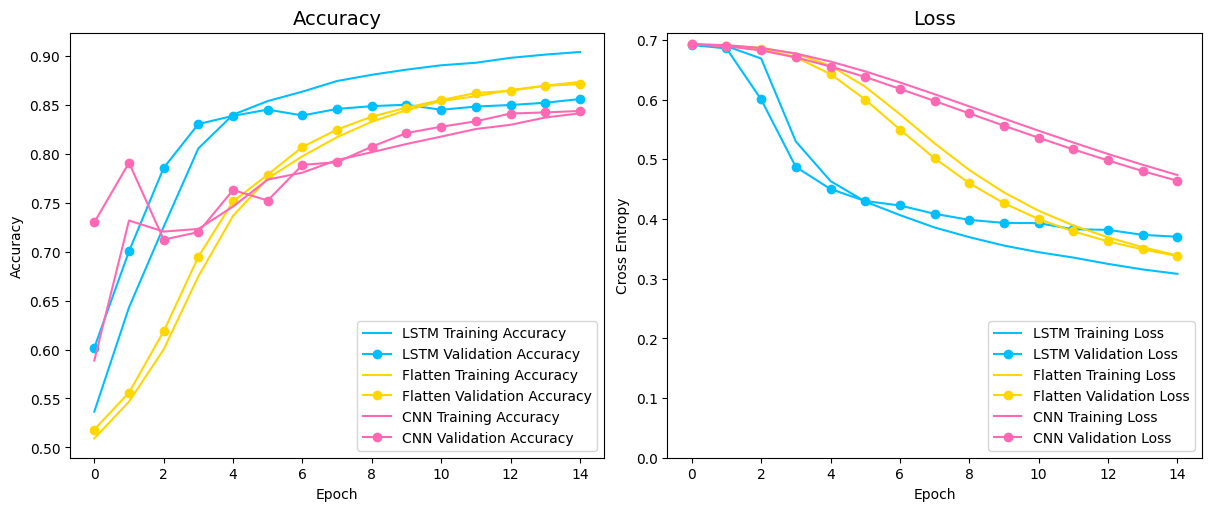

In [151]:
# training and validation accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), constrained_layout=True)

acc_lstm= history_lstm.history['accuracy']
val_acc_lstm = history_lstm.history['val_accuracy']

acc_flatten = history_flatten.history['accuracy']
val_acc_flatten = history_flatten.history['val_accuracy']

acc_cnn = history_CNN.history['accuracy']
val_acc_cnn = history_CNN.history['val_accuracy']

ax[0].plot(acc_lstm, label='LSTM Training Accuracy', color='deepskyblue', )
ax[0].plot(val_acc_lstm, label='LSTM Validation Accuracy', color='deepskyblue', marker='o')

ax[0].plot(acc_flatten, label='Flatten Training Accuracy', color='gold', )
ax[0].plot(val_acc_flatten, label='Flatten Validation Accuracy', color='gold', marker='o')

ax[0].plot(acc_cnn, label='CNN Training Accuracy', color='hotpink', )
ax[0].plot(val_acc_cnn, label='CNN Validation Accuracy', color='hotpink', marker='o')

ax[0].legend(loc='lower right')
ax[0].set(xlabel='Epoch', ylabel='Accuracy')
ax[0].set_title('Accuracy', size=14)

# training and validation loss

loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']

loss_flatten = history_flatten.history['loss']
val_loss_flatten = history_flatten.history['val_loss']

loss_cnn = history_CNN.history['loss']
val_loss_cnn = history_CNN.history['val_loss']

ax[1].plot(loss_lstm, label='LSTM Training Loss', color='deepskyblue', )
ax[1].plot(val_loss_lstm, label='LSTM Validation Loss', color='deepskyblue', marker='o')

ax[1].plot(loss_flatten, label='Flatten Training Loss', color='gold', )
ax[1].plot(val_loss_flatten, label='Flatten Validation Loss', color='gold', marker='o')

ax[1].plot(loss_cnn, label='CNN Training Loss', color='hotpink', )
ax[1].plot(val_loss_cnn, label='CNN Validation Loss', color='hotpink', marker='o')

ax[1].legend(loc='lower right')
ax[1].set(xlabel='Epoch', ylabel='Cross Entropy', ylim=[0,max(plt.ylim())])
ax[1].set_title('Loss', size=14)

plt.show()